In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras.models import Model


In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape the data to include channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))


Build the Denoising Autoencoder Model


In [3]:
# Define the size of the input layer
input_shape = (28, 28, 1)

# Build the encoder
input_layer = Input(shape=input_shape)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

# Build the decoder
decoded = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(decoded)

# Compile the autoencoder model
denoising_autoencoder = Model(input_layer, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Train the Denoising Autoencoder

In [4]:
# Train the autoencoder
denoising_autoencoder.fit(x_train_noisy, x_train,
                           epochs=10,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - loss: 0.3270 - val_loss: 0.1057
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 161ms/step - loss: 0.1059 - val_loss: 0.1031
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - loss: 0.1034 - val_loss: 0.1013
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 166ms/step - loss: 0.1021 - val_loss: 0.1005
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 155ms/step - loss: 0.1011 - val_loss: 0.0995
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - loss: 0.1005 - val_loss: 0.0988
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - loss: 0.0998 - val_loss: 0.0984
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 159ms/step - loss: 0.0993 - val_loss: 0.0981
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - loss: 0.0987 - val_loss: 0.0978
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 164ms/step - loss: 0.0983 - val_loss: 0.0975


Evaluate the Denoising Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


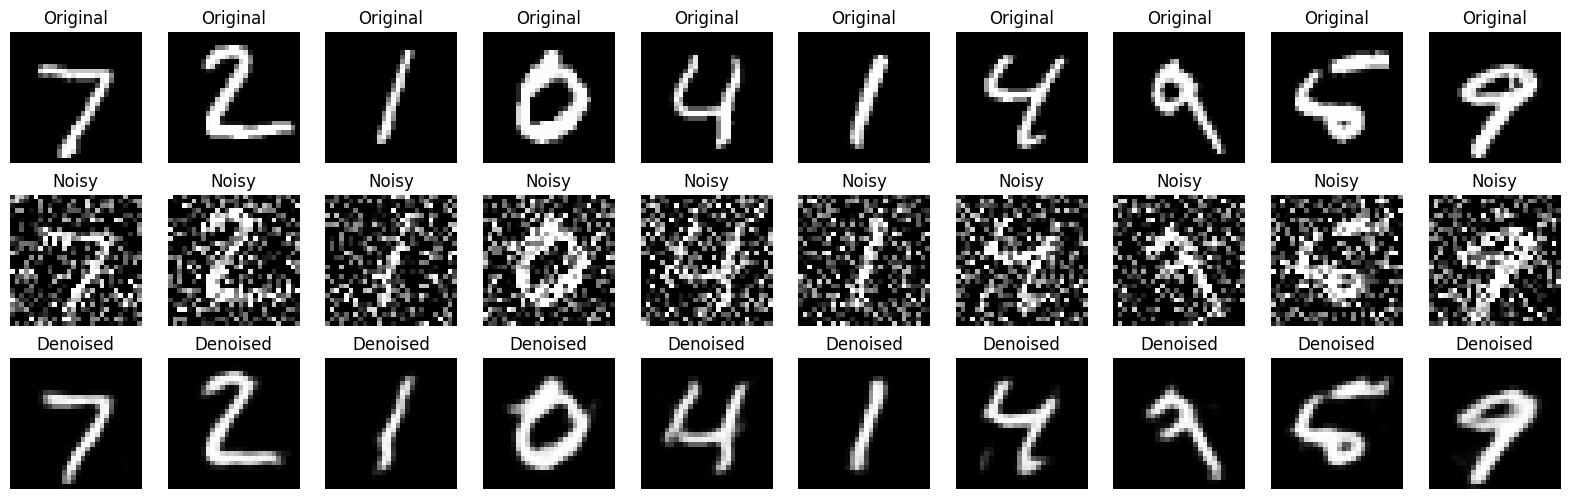

In [5]:
# Decode some noisy digits
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()
